Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import L2
from keras.layers import BatchNormalization

In [ ]:
## If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height, img_width),seed=123,subset='training',validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height, img_width),seed=123,subset='validation',validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

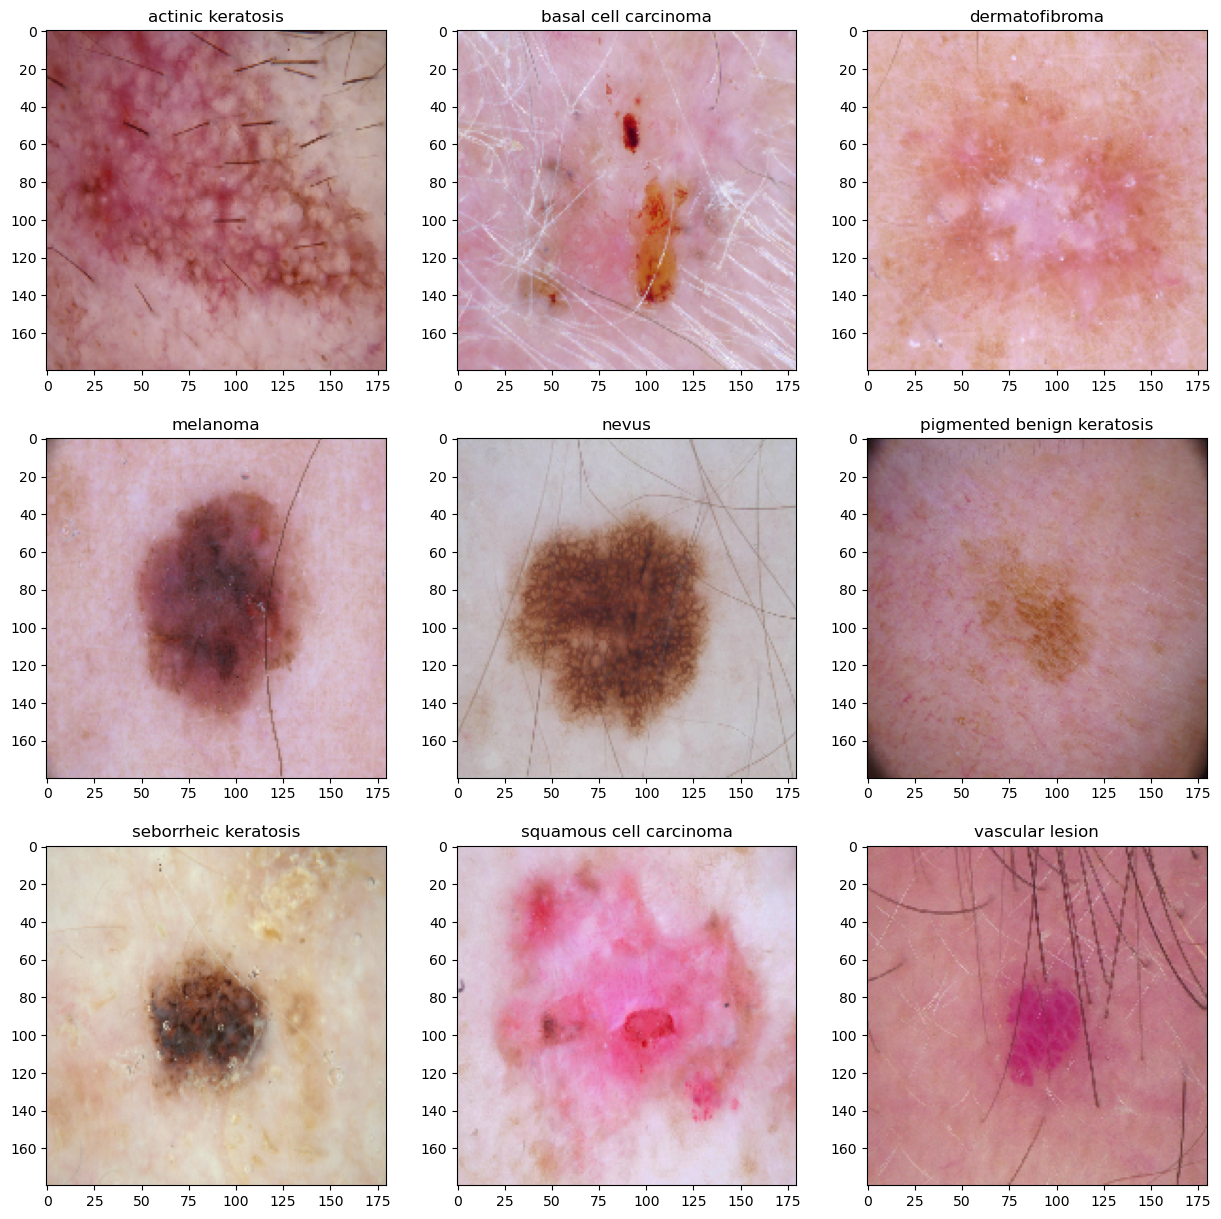

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(files_path_dict[c][0],target_size=(img_height,img_width)))
    plt.title(c)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here

input_shape = (img_height,img_width,3)

model = Sequential()

## Rescaling tp normalize
model.add(layers.experimental.preprocessing.Rescaling(scale=1./255,input_shape=input_shape))

## First Convolution layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

## Second Convolution layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

## Third Convolution layer
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())

## DenseLayer

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(len(class_names),activation='softmax'))






### Compile the model
Choose an appropirate optimiser and loss function for model training

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [14]:
epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20


56/56 [==============================] - 158s 2s/step - loss: 2.1592 - accuracy: 0.2081 - val_loss: 1.9200 - val_accuracy: 0.2573
Epoch 2/20
56/56 [==============================] - 56s 1s/step - loss: 1.7438 - accuracy: 0.3661 - val_loss: 1.9352 - val_accuracy: 0.3400
Epoch 3/20
56/56 [==============================] - 58s 1s/step - loss: 1.6049 - accuracy: 0.4297 - val_loss: 1.5041 - val_accuracy: 0.5056
Epoch 4/20
56/56 [==============================] - 62s 1s/step - loss: 1.4616 - accuracy: 0.4888 - val_loss: 1.3845 - val_accuracy: 0.5190
Epoch 5/20
56/56 [==============================] - 55s 976ms/step - loss: 1.3983 - accuracy: 0.4944 - val_loss: 1.5427 - val_accuracy: 0.4497
Epoch 6/20
56/56 [==============================] - 55s 978ms/step - loss: 1.3431 - accuracy: 0.5206 - val_loss: 1.5866 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 55s 975ms/step - loss: 1.3187 - accuracy: 0.5273 - val_loss: 1.3498 - val_accuracy: 0.5280
Epoch 8/

### Visualizing training results

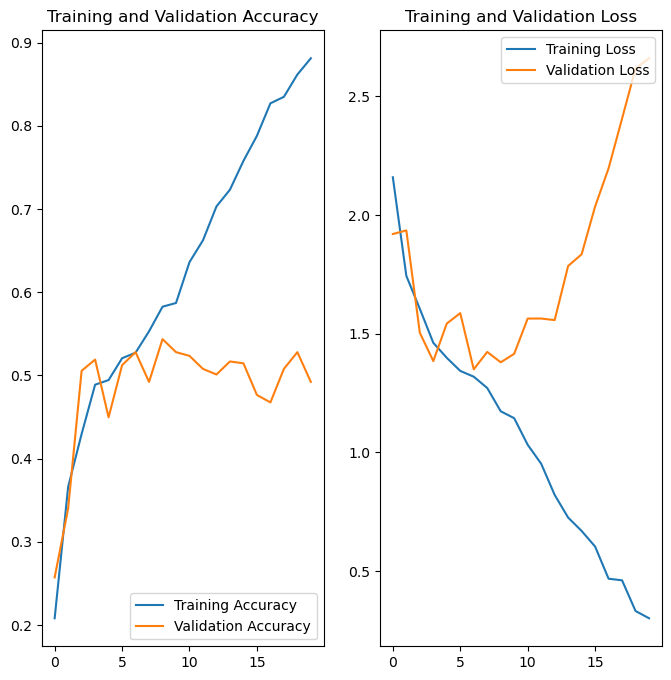

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Overfitting:
#### Indication: In an overfit model, the training accuracy continues to increase, but the validation accuracy plateaus or starts decreasing after a certain point.

### Write your findings here

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
rescale = tf.keras.Sequential([
  #To rescale an input in the [0, 255] range to be in the [0, 1] range
  layers.experimental.preprocessing.Rescaling(1./255)
])

datagen = tf.keras.Sequential()

# Data augmentation layers using Sequential API
datagen.add(tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical'))
datagen.add(tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.2))
datagen.add(tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=0.2))
datagen.add(tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.2, width_factor=0.2))

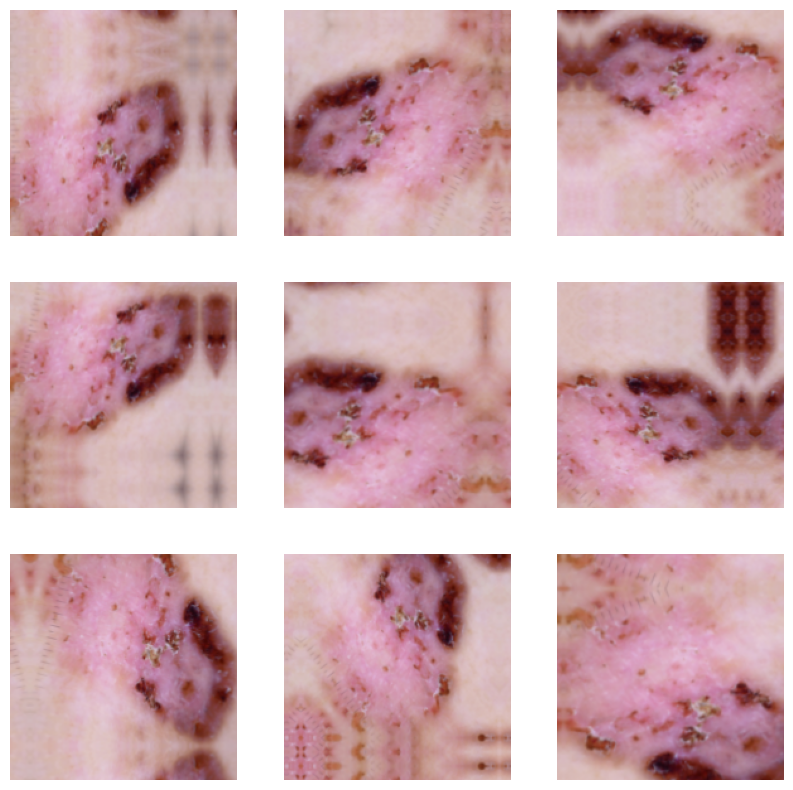

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = datagen(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

### Lets use the same number of layers and with same same trainable parameters , but now lets add the augmentation layer and the dropout layer
from keras.layers import Dropout

model2 = Sequential()

## Rescaling tp normalize
model2.add(rescale)

## augmentation
model2.add(datagen)

## First Convolution layer
model2.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

## Second Convolution layer
model2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

## Third Convolution layer
model2.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(layers.Flatten())

## DenseLayer

model2.add(Dense(512,activation='relu'))
model2.add(Dense(256,activation='relu'))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(len(class_names),activation='softmax'))


### Compiling the model

In [19]:
## Your code goes here
model2.compile(optimizer='Adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
history = model2.fit(train_ds,validation_data=val_ds,epochs=epochs,verbose=1)

Epoch 1/20
56/56 [==============================] - 81s 1s/step - loss: 2.1377 - accuracy: 0.1948 - val_loss: 1.8835 - val_accuracy: 0.3177
Epoch 2/20
56/56 [==============================] - 71s 1s/step - loss: 1.8454 - accuracy: 0.3114 - val_loss: 1.7541 - val_accuracy: 0.3579
Epoch 3/20
56/56 [==============================] - 71s 1s/step - loss: 1.7760 - accuracy: 0.3516 - val_loss: 1.6661 - val_accuracy: 0.4183
Epoch 4/20
56/56 [==============================] - 71s 1s/step - loss: 1.6785 - accuracy: 0.3873 - val_loss: 1.6024 - val_accuracy: 0.4139
Epoch 5/20
56/56 [==============================] - 71s 1s/step - loss: 1.6447 - accuracy: 0.3862 - val_loss: 1.5882 - val_accuracy: 0.4295
Epoch 6/20
56/56 [==============================] - 72s 1s/step - loss: 1.6268 - accuracy: 0.4051 - val_loss: 1.5310 - val_accuracy: 0.4497
Epoch 7/20
56/56 [==============================] - 71s 1s/step - loss: 1.6188 - accuracy: 0.4090 - val_loss: 1.5261 - val_accuracy: 0.4743
Epoch 8/20
56/56 [==

### Visualizing the results

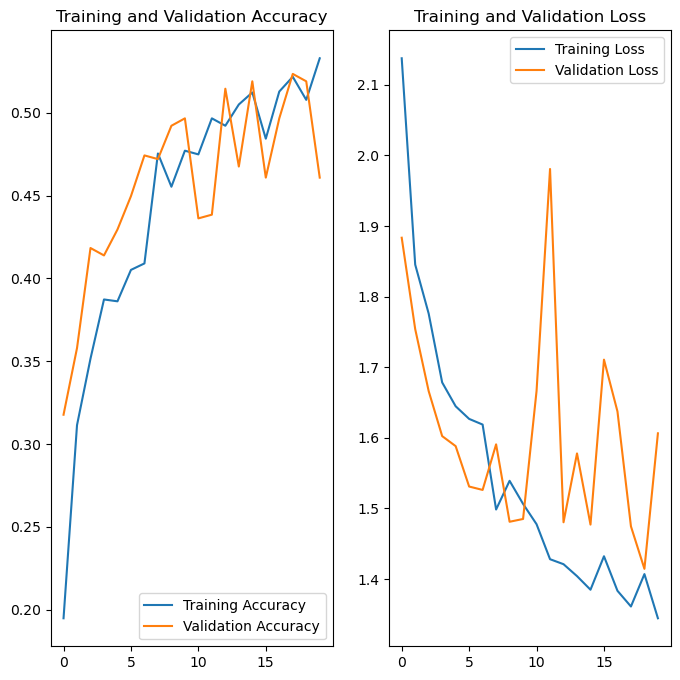

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


**The issue of overfit is reduced as seen from the graph , this was resolved by adding data augmentation layer and dropout layers.**

**However we still have underperforming Model as the data across all the classes may be different. Lets go ahead and resolve them.**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:
## Your code goes here.
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)


In [23]:
df.sort_values('No. of Image')

,Class,No. of Image
6,seborrheic keratosis,77
2,dermatofibroma,95
0,actinic keratosis,114
8,vascular lesion,139
7,squamous cell carcinoma,181
4,nevus,357
1,basal cell carcinoma,376
3,melanoma,438
5,pigmented benign keratosis,462


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
- seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
- pigmented benign keratosis, melanoma, basal cell carcinoma, nevus


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D500356D90>: 100%|██████████| 500/500 [00:11<00:00, 45.11 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D54FF67AD0>: 100%|██████████| 500/500 [00:11<00:00, 44.83 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D500067610>: 100%|██████████| 500/500 [00:11<00:00, 43.05 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x1D57D44EF10>: 100%|██████████| 500/500 [01:13<00:00,  6.84 Samples/s]                  


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D57D38C750>: 100%|██████████| 500/500 [00:57<00:00,  8.74 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D50042D590>: 100%|██████████| 500/500 [00:11<00:00, 45.03 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1D54FFC5BD0>: 100%|██████████| 500/500 [00:25<00:00, 19.60 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D5500099D0>: 100%|██████████| 500/500 [00:11<00:00, 43.04 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D550062990>: 100%|██████████| 500/500 [00:11<00:00, 43.20 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [30]:
from glob import glob

In [70]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [71]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [33]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [34]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [39]:
class_distribution_count(data_dir_train)

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


In [35]:
df2['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [72]:
data_dir_train=pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/")



#### **Todo**: Train the model on the data created using Augmentor

In [36]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [40]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [66]:
## your code goes here
model3 = Sequential()

## Rescaling tp normalize
model3.add(rescale)

## First Convolution layer
model3.add(Conv2D(16,kernel_size=(3,3),activation='relu'))

model3.add(MaxPool2D(pool_size=(2,2)))

## Second Convolution layer
model3.add(Conv2D(32,kernel_size=(3,3),activation='relu'))

model3.add(MaxPool2D(pool_size=(2,2)))


## Third Convolution layer
model3.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))


model3.add(layers.Flatten())

## DenseLayer
model3.add(Dense(128,activation='relu'))
model3.add(Dense(len(class_names),activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [67]:
## your code goes here

model3.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

#### **Todo:**  Train your model

In [68]:
epochs = 20
## Your code goes here, use 50 epochs.
history = model3.fit(train_ds,validation_data=val_ds,epochs=epochs,verbose=1)

Epoch 1/20
169/169 [==============================] - 92s 515ms/step - loss: 1.8992 - accuracy: 0.2702 - val_loss: 1.6489 - val_accuracy: 0.3727
Epoch 2/20
169/169 [==============================] - 131s 771ms/step - loss: 1.5291 - accuracy: 0.4114 - val_loss: 1.3534 - val_accuracy: 0.4996
Epoch 3/20
169/169 [==============================] - 93s 521ms/step - loss: 1.2958 - accuracy: 0.5132 - val_loss: 1.3076 - val_accuracy: 0.5301
Epoch 4/20
169/169 [==============================] - 85s 493ms/step - loss: 1.1786 - accuracy: 0.5673 - val_loss: 1.1922 - val_accuracy: 0.5746
Epoch 5/20
169/169 [==============================] - 82s 477ms/step - loss: 0.9756 - accuracy: 0.6411 - val_loss: 0.9992 - val_accuracy: 0.6422
Epoch 6/20
169/169 [==============================] - 80s 466ms/step - loss: 0.8494 - accuracy: 0.6942 - val_loss: 0.9312 - val_accuracy: 0.6600
Epoch 7/20
169/169 [==============================] - 75s 436ms/step - loss: 0.7291 - accuracy: 0.7387 - val_loss: 0.8238 - val_a

#### **Todo:**  Visualize the model results

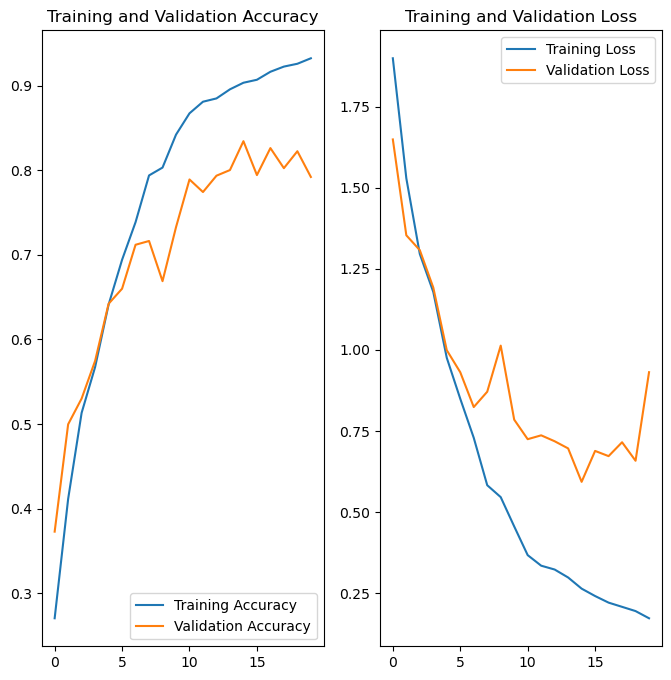

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



> We see that the training accuracy and validation accuracy increase together upto 70% and then see a fluctuating increase. It is clear that the overfittting issue is well taken care of.

> Also we see the improvement in model performance, we have training accuracy of around 93% and validation accuracy of around 80%